# Estudo da distribuição de tempo da versão Sequencial da função Alpha

Comecemos com um previsível. Quando o intervalo de integração é pequeno e o erro grande, o approach sequencial ganho do approach concorrente devido ao overhead de criação de threads. Como podemos notar, o cálculo sequencial é rápido suficiente para tornar rejeitável a criação de outros fluxos de execução.

Parâmetros: ./sec 0.001 0 1000

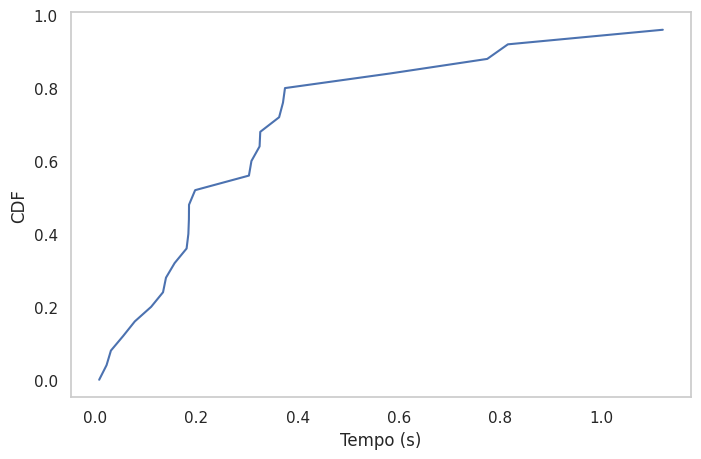

In [18]:
import numpy as np

alpha_sec = np.array([
    0.81570499,
    0.37110714,
    0.13983715,
    0.13398475,
    0.07818740,
    0.30378340,
    0.00776985,
    0.77484197,
    0.18056764,
    0.18406981,
    0.02235516,
    0.03095344,
    0.18535571,
    0.32620444,
    0.11046604,
    0.05517772,
    0.15689518,
    0.36347144,
    0.19745318,
    0.30874501,
    0.58242553,
    0.37507632,
    0.32486514,
    1.12196699,
    0.18514015
])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.sort(alpha_sec), np.linspace(0, 1, len(alpha_sec), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()




In [19]:
print('Mean: ', np.mean(alpha_sec))
print('Std: ', np.std(alpha_sec))

Mean:  0.293456222
Std:  0.2668368840403412


Como podemos ver, temos uma chance de mais de 80% da execução demorar menos que 0.4 segundos, porém, não podemos aproximar diretamente esse valor para a média amostral dada a variância amostral alta. 

# Estudo da distribuição de tempo da alpha concorrente, com dois fluxos de execução.

Parâmetros: ./conc 0.001 0 1000

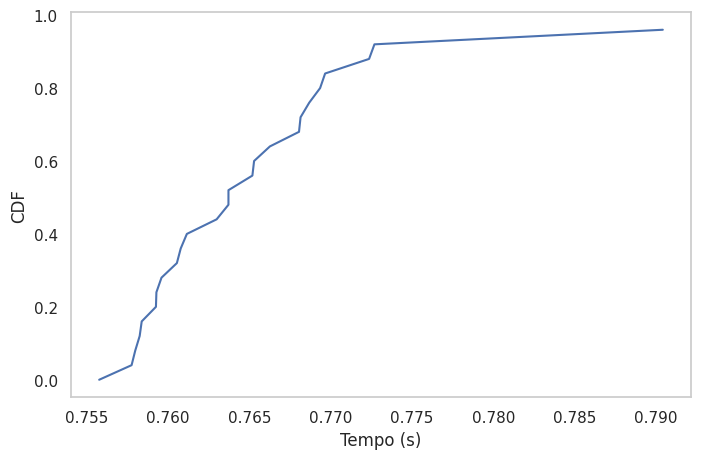

In [20]:
alpha_conc_2 = np.array([
    0.769661,
    0.759255,
    0.766265,
    0.761157,
    0.758255,
    0.757982,
    0.763716,
    0.768151,
    0.762988,
    0.772695,
    0.763715,
    0.790433,
    0.759284,
    0.760779,
    0.769353,
    0.755764,
    0.760543,
    0.772366,
    0.765292,
    0.758380,
    0.768055,
    0.768684,
    0.765188,
    0.757758,
    0.759597,
])

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(np.sort(alpha_conc_2), np.linspace(0, 1, len(alpha_conc_2), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()

In [21]:
print('Mean: ', np.mean(alpha_conc_2))
print('Std: ', np.std(alpha_conc_2))

Mean:  0.76461264
Std:  0.0071071113224994665


Nesse caso, como temos uma CDF de caráter convergente muito mais rápido do que o da primeira e a variância amostral é tão pequena que a podemos desconsiderar, podemos claramente aproximar empiricamente a distribuição de tempo real da média amostral. Espera-se, pelo teorema fundamental do limite que a média amostral tenda a média real a medida que o número de amostras tenda ao infinito, porém, nesse caso, como já podemos notar a convergência com poucas amostras, podemos aproximar.

# Adicionando mais fluxos

Segue que a melhora, em média, de aumentar para quatro o número de fluxos de execução se da por volta de 0.710029 segundos, ou seja, uma melhora, em média, de .05 segundos.
Para 8 fluxos, temos uma melhora mais considerável comparando ainda os dois primeiros fluxos do gráfico, saimos de 0.76 para 0.46. Para 12 fluxos (Limite do meu processador), apesar de baixo, temos um ganho de performance, passamos para 0.444955 em média.

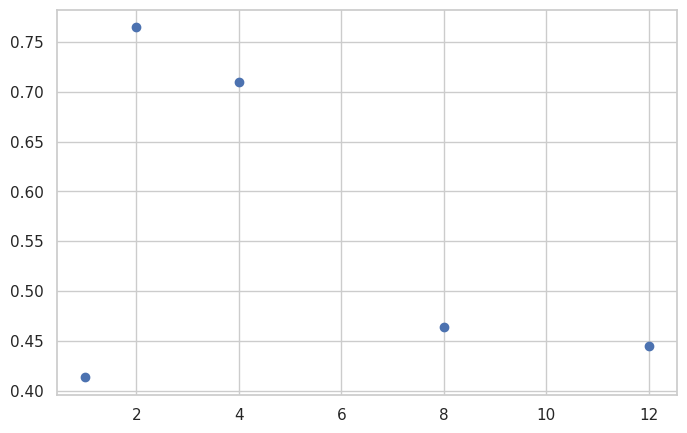

In [25]:
aprox_empiric_seq = 0.413333
mean_2 = 0.76461264
mean_4 = 0.71002916
mean_8 = 0.46343591
mean_12 = 0.444955

plt.figure(figsize=(8, 5))
plt.plot([1, 2, 4, 8, 12], [aprox_empiric_seq, mean_2, mean_4, mean_8, mean_12], 'o')



Como foi mencionado no começo desse estudo, para os parâmetros de entrada cujo intervalo é curto e erro grande, em média, é preferível se optar pela versão sequencial. Veremos que conforme aumentamos o valor do intervalo e diminuímos o erro aceitável, o cenário se inverte drasticamente e passa a ser muito vantajoso usar concorrência.

# Mesma função, intervalo maior, erro menor.

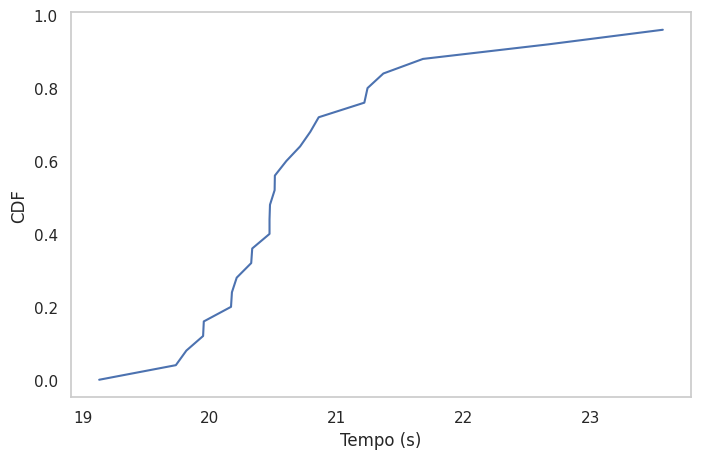

Mean:  20.678306812000002
Std:  0.9104721264599082


In [53]:

seq2_alpha = [
    20.7925112,
    20.51340285,
    20.85887285,
    21.24363405,
    20.47125427,
    20.47126148,
    21.36832959,
    20.51150796,
    20.16781759,
    20.21266302,
    23.57047984,
    22.66946356,
    21.68053358,
    19.73318459,
    19.81598035,
    20.32702105,
    19.12898208,
    20.71230689,
    20.1750506,
    19.95339165,
    21.21841187,
    20.47493646,
    20.6038601,
    19.94792161,
    20.33489121
]

plt.figure(figsize=(8, 5))
plt.plot(np.sort(seq2_alpha), np.linspace(0, 1, len(seq2_alpha), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()

print('Mean: ', np.mean(seq2_alpha))
print('Std: ', np.std(seq2_alpha))


Comparemos agora com a versão concorrente:

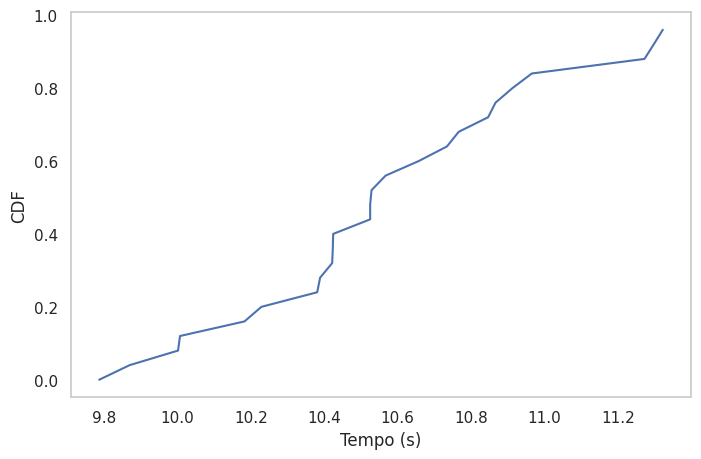

Mean:  10.55639911179645
Std:  0.41196330074618814


In [47]:
conc_2_alpha = [
    9.787276891193022,
    10.912965145270459,
    11.297726352420302,
    10.84660350388461,
    10.56749514759474,
    10.525346565183767,
    10.525353781708876,
    11.32242188856399,
    10.965600258062736,
    10.42190988917196,
    10.866755323330885,
    11.272504172195156,
    9.870072650473094,
    10.424572142750543,
    10.423555863420907,
    10.734625879409979,
    10.381113349227004,
    10.183074375906338,
    10.766399185158063,
    10.229142902818925,
    10.007483952748462,
    10.529028755351561,
    10.657952402748485,
    10.388983506995348,
    10.002013909322043
]

plt.figure(figsize=(8, 5))
plt.plot(np.sort(conc_2_alpha), np.linspace(0, 1, len(conc_2_alpha), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()

print('Mean: ', np.mean(conc_2_alpha))
print('Std: ', np.std(conc_2_alpha))

Podemos notar pela cumulativa da distribuição de tempo de execução com dois fluxos concorrente que sua performance é cerca de duas vezes mais rápida que a concorrente. Podemos, com um alto intervalo de confiança atribuir tais resultados a análise feita inicialmente: Quanto mais a demanda de CPU, mais valherá a pena instanciar novos fluxos de execução. A tendência é que o tempo vá melhorando a medida que o número dos fluxos de execução se aproxima do número de núcleos da máquina.

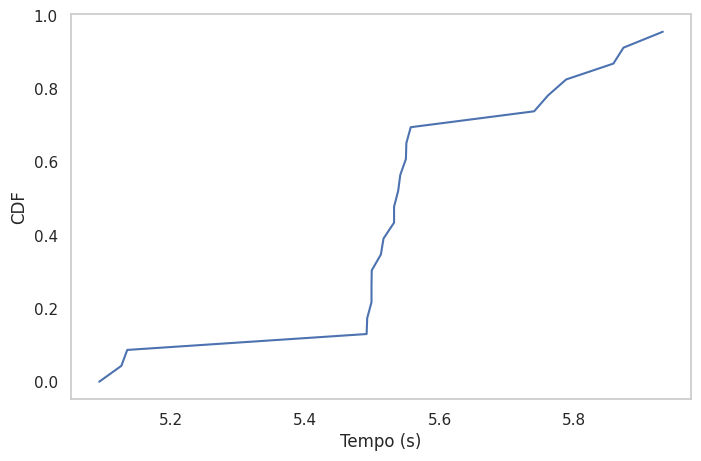

Mean:  5.548507695652175
Std:  0.21503789463789558


In [52]:
conc_4_alpha = np.array([
    5.538137,
    5.498405,
    5.516261,
    5.498743,
    5.491997,
    5.556854,
    5.531998,
    5.550305,
    5.549639,
    5.858670,
    5.788254,
    5.740648,
    5.761345,
    5.873670,
    5.932254,
    5.134648,
    5.541237,
    5.498405,
    5.092834,
    5.491124,
    5.512397,
    5.125854,
    5.531998,
])

plt.figure(figsize=(8, 5))
plt.plot(np.sort(conc_4_alpha), np.linspace(0, 1, len(conc_4_alpha), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()

print('Mean: ', np.mean(conc_4_alpha))
print('Std: ', np.std(conc_4_alpha))

Como mencionado, melhoramos de forma substancial, novamente, o tempo de execução. Esse comportamento segue para 8 e 12 fluxos de execução.

Para 8 fluxos, temos 3.323101, em média.

Para 12 fluxos, temos 2.689042, em média.

## Analisemos a melhora de tempo médio com a adição de novos fluxos de execução


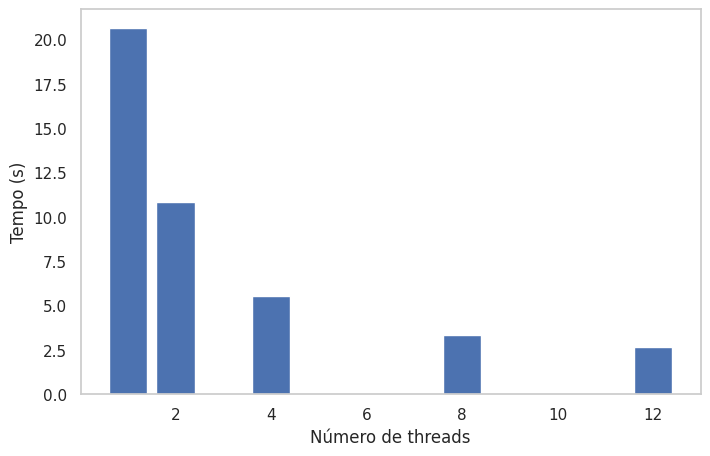

In [59]:
sequencial = 20.678306812000002
conc_2 = 10.83639911179645
conc_4 = 5.548507695652175
conc_8 = 3.323101
conc_12 = 2.689042

# grafico em barra com os tempos
plt.figure(figsize=(8, 5))
plt.bar([1, 2, 4, 8, 12], [sequencial, conc_2, conc_4, conc_8, conc_12])
plt.xlabel('Número de threads')
plt.ylabel('Tempo (s)')
plt.grid()
plt.show()


Podemos notar que há uma melhora consirável no tempo, como foi mencionado. Nota-se também a convergência rápida do tempo de execução a um limiar próxima de 2.3 a medida que aumenta-se os fluxos de execução. 

# Análise da função Beta (G).

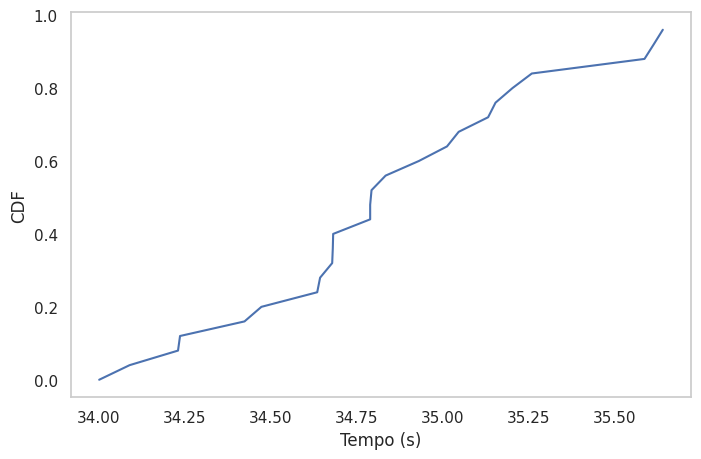

Mean:  34.822400866
Std:  0.43955563739472886


In [39]:
seq_version = np.array([
    35.13204246,
    34.83424008,
    35.20284885,
    35.61338045,
    34.78926849,
    34.78927619,
    35.63973004,
    35.25900934,
    34.67890387,
    35.15354415,
    34.68174443,
    34.68066008,
    35.01256484,
    34.00176464,
    34.09010587,
    34.63537487,
    34.42407171,
    35.04646624,
    34.4732258,
    34.23672066,
    35.58646895,
    34.7931973,
    34.93075595,
    34.23088424,
    34.64377215
])

# Plote a cdf da distribuição de tempo acima
plt.figure(figsize=(8, 5))
plt.plot(np.sort(seq_version), np.linspace(0, 1, len(seq_version), endpoint=False))
plt.xlabel('Tempo (s)')
plt.ylabel('CDF')
plt.grid()
plt.show()

print('Mean: ', np.mean(seq_version))
print('Std: ', np.std(seq_version))

Como o tempo foi consideravelmente alto para a versão sequencial, podemos esperar que exista um certo ganho adicionando mais fluxos de execução. Peguemos um valor um pouco acima da média como referência, digamos 35.25. A distribuição de probabilidade tem cerca de 94% de chance de ser menor que 35.25, então estamos trabalhando com um intervalo de confiança aceitável.

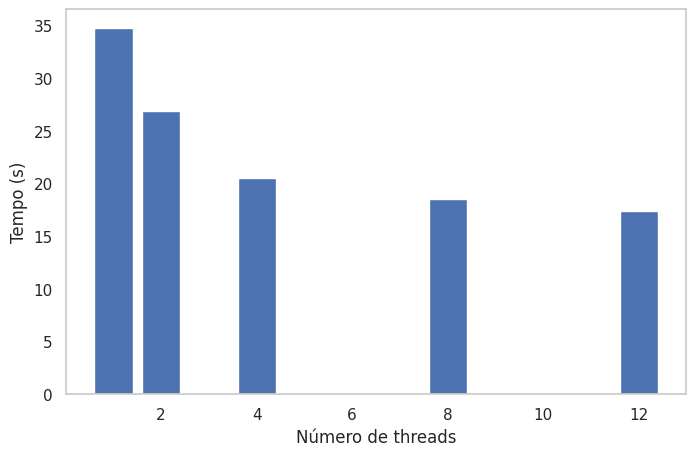

In [56]:

sequencial = 34.822400866
conc_2 = 26.863146
conc_4 = 20.533816
conc_8 = 18.511155
conc_12 = 17.370797

# bar plot
plt.figure(figsize=(8, 5))
plt.bar([1, 2, 4, 8, 12], [sequencial, conc_2, conc_4, conc_8, conc_12])
plt.xlabel('Número de threads')
plt.ylabel('Tempo (s)')
plt.grid()
plt.show()



Novamente nota-se uma melhora considerável quando escolhemos a versão concorrente. Nota-se, mais uma vez que o tempo de execução tende a um limiar e essa convergência acontece-se muito rápido no cenário da função Beta, onde podemos notar que quase não há melhora em aumentar de 4 para 8 e o comportamento continua aumentando de 8 para 12 fluxos.